In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank


In [2]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/adjmatrixSano.tsv'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/alex/Desktop/adjmatrixSano.tsv


In [3]:
data=pd.read_table(file)

In [4]:
data.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,1.0,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,...,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721
1,NaN,1.000000,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,...,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721
2,NaN,NaN,1.000000,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,...,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721
3,NaN,NaN,NaN,1.000000,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,...,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721
4,NaN,NaN,NaN,NaN,1.000000,0.089721,0.089721,0.089721,0.089721,0.089721,...,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721,0.089721


In [5]:
a=np.diag(np.ones(16438),0)
A=data-a

In [6]:
#Este modulo calcula un valor umbral ("threshold") que promedia todos los valores de las 
# entradas de un data set

# Función convertir a lista el resultado de aplicar .mean() a un DataFrame

def mean_to_list(df):
    arr=[]
    for i in range(0,len(df)):
        a=df.iloc[i]
        arr.append(a)
    return arr

# Función para calcular el promedio de las entradas de una lista 

def cal_prom_en_list(num):
    sum_num=0
    for entrada in num:
        sum_num=sum_num +entrada
        
    prom = sum_num/len(num)
    return prom

# Cálculo del umbral, promediando sobre todas las entradas de la matriz de adyacencia

A_prom_cols=A.mean()
A_mean_list=mean_to_list(A_prom_cols)
cal_prom_en_list(A_mean_list)
threshold=cal_prom_en_list(A_mean_list)

In [7]:
threshold

0.08966466426988616

In [8]:

# El siguiente módulo, crea un array con los primeros "n" genes que deseen obtener del
# Data Frame "data"

#Parametros: data , n 

def get_genes(data,n):
    
    genes_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_genes_extracted = range(n)
    genes = np.array(genes_arr)[num_genes_extracted]
    
    return genes


In [9]:
#Este script es capaz de dibujar el grafo con sus vértices respectivos etiquetados

#Este módulo ha sifo modificado para que sea capaz de etiquetar los nombres de los genes 
#involucrados

def plt_with_label(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    
    labelmap=dict(zip(adj_to_graph.nodes(),get_genes(data,n))) # el primer parámetro es 
    #el grupo de nodos que será manipulado y el segundo todos los nombres o etiquetas que se usaran
    
    plt.figure(1,figsize=(12,12))
    nx.draw(adj_to_graph, labels=labelmap, with_labels=True,
    font_size=7,font_weight='bold',font_color='green',edge_color='gray',node_color='blue')
    
    
    
    graph_with_lab=plt.show()
    
    return graph_with_lab

In [23]:
#Función para contruir la matriz de grado a partir de la de la matriz de adyacencia

def degreeMat_from_Adj(mat,n):
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans    #type(simm_mat)=numpy matrix
    
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    
    L_arr=L_from_Adj.toarray()
    
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    return deg_Mat

In [25]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

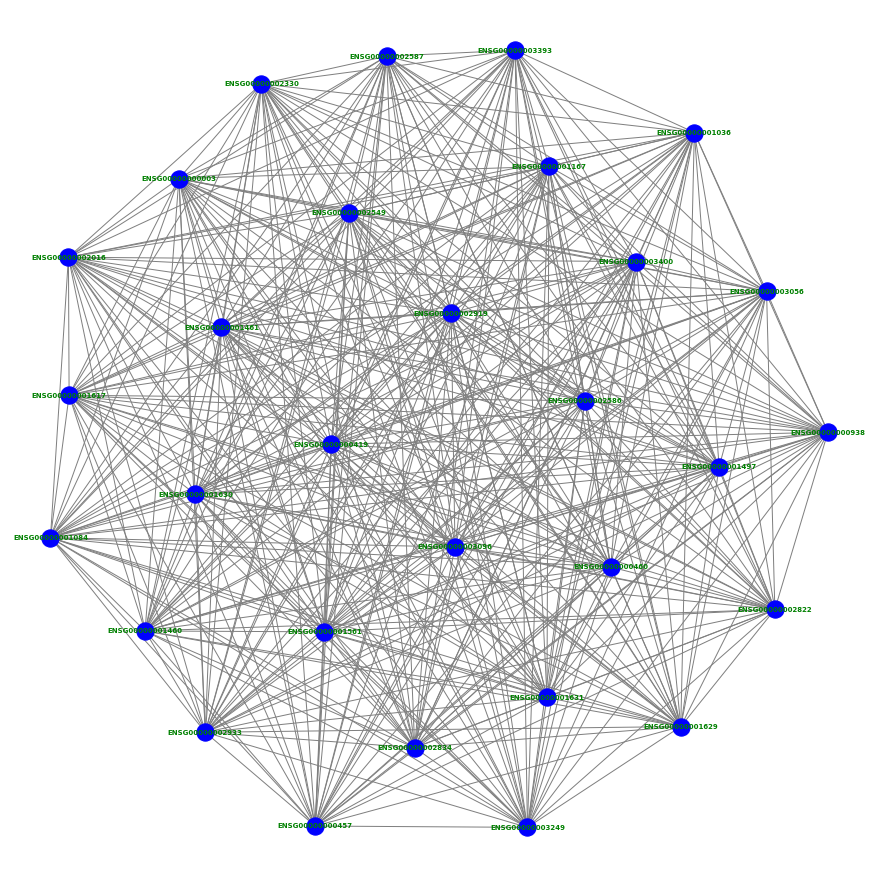

In [22]:
plt_with_label(A,30)

In [24]:
degreeMat_from_Adj(A,30)

matrix([[29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0

In [29]:
mat_shape(A,30)

matrix([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.